<a href="https://colab.research.google.com/github/Nancy-Shi/Complex_Networks/blob/main/3_Layer_Coupling_072523_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 3-Layer Model with Informtion, Behavior, Disease

In [108]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random
import math as math
from math import log
import seaborn as sns
import pandas as pd


## Part 1: Hypergraph Generation
The following steps generate a hyper graph using the XGI/HyperNetX python package,  following power-law degree distribution for predifined number of nodes n, number of hyperedges num_hyper_edges, degree exponent gamma, using a configuration model with data stored in a dictionary.

In [109]:
# Step 1: Generate Degree Sequence
def generate_degree_sequence(n, gamma, kmin):
    # Generate a random set from the power law distribution
    u = np.random.uniform(size=n)
    degrees = np.ceil((1.0 - u) ** (-1.0 / (gamma - 1.0)))

    # Adjust degrees based on the minimum and maximum degree values
    kmax = int(np.sqrt(n))
    # kmax = int(1.5*n**(1/4)) # max degree allowed is 1.5*n^(1/4)
    degrees = degrees[(degrees >= kmin) & (degrees <= kmax)].astype(int)

    # Truncate or pad the sequence to match the length specified
    if len(degrees) >= n:
        degrees = degrees[:n]
    else:
        degrees = np.concatenate((degrees, np.full(n - len(degrees), kmin)))

    return degrees.tolist()

# Step 2: Generate Hyper Edge Size Sequence
def generate_hyper_edge_sizes(degrees, num_hyper_edges):
    total_degrees = sum(degrees)
    hyper_edge_sizes = []

    # Calculate the average size for each hyper edge
    avg_size = total_degrees // num_hyper_edges
    remainder = total_degrees % num_hyper_edges

    # Define the range for the random distribution
    min_size = 1  # Lower bound of the range
    max_size = len(degrees)-num_hyper_edges  # Upper bound of the range

    # Generate hyper edge sizes
    for _ in range(num_hyper_edges):
        size = random.randint(min_size, max_size)
        hyper_edge_sizes.append(size)

    return hyper_edge_sizes


# Step 3: Create Copies of Nodes
def create_node_copies(degrees):
    node_copies = []
    for i, degree in enumerate(degrees):
        for _ in range(degree):
            node_copies.append(i)
    return node_copies

# Step 4: Create Copies of Hyper Edges
def create_hyper_edge_copies(hyper_edge_sizes):
    hyper_edge_copies = []
    for i, size in enumerate(hyper_edge_sizes):
        for _ in range(size):
            hyper_edge_copies.append(i)
    return hyper_edge_copies

# Step 5: Randomly Pair Copies
def randomly_pair_copies(node_copies, hyper_edge_copies):
    random.shuffle(node_copies)
    random.shuffle(hyper_edge_copies)
    pairs = []
    for i in range(len(node_copies)):
        pairs.append((node_copies[i], hyper_edge_copies[i]))
    return pairs

# Step 6: Convert Bipartite Graph to A Hypergraph Dictionary
def convert_to_hypergraph(pairs):
    hypergraph = {}
    for pair in pairs:
        node, hyper_edge = pair
        if hyper_edge in hypergraph:
            hypergraph[hyper_edge].append(node)
        else:
            hypergraph[hyper_edge] = [node]
    return hypergraph


In [111]:
def build_hypergraph(n, gamma, kmin, num_hyper_edges):
    # Step 1: Generate Degree Sequence
    degrees = generate_degree_sequence(n, gamma, kmin)
    print("Degree Sequence: ", degrees)

    # Step 2: Generate Hyper Edge Size Sequence
    hyper_edge_sizes = generate_hyper_edge_sizes(degrees, num_hyper_edges)
    print("Hyper Edge Sizes: ", hyper_edge_sizes)

    # Step 3: Create Copies of Nodes
    node_copies = create_node_copies(degrees)

    # Step 4: Create Copies of Hyper Edges
    hyper_edge_copies = create_hyper_edge_copies(hyper_edge_sizes)

    # Step 5: Randomly Pair Copies
    pairs = randomly_pair_copies(node_copies, hyper_edge_copies)

    # Step 6: Convert Bipartite Graph to Hypergraph
    hyperedge_dict = convert_to_hypergraph(pairs)

    # Print the resulting hypergraph
    print("Hypergraph Dictionary: ", hyperedge_dict)

    return degrees, hyperedge_dict

In [112]:
!pip install hypernetx
import hypernetx as hnx

In [113]:
# Test 2
n2 =400  # Number of nodes
gamma2 = 2.5  # Power-law exponent
kmin2 = 3  # Minimum degree
num_hyper_edges2 = 100  # Desired number of hyper edges

degrees2, hyperedge_dict2 = build_hypergraph(n2, gamma2, kmin2, num_hyper_edges2)
H2 = hnx.Hypergraph(hyperedge_dict2)

Degree Sequence:  [3, 3, 6, 3, 6, 8, 3, 3, 3, 12, 6, 4, 5, 4, 3, 3, 3, 3, 7, 4, 3, 3, 8, 3, 3, 8, 7, 4, 4, 5, 4, 3, 4, 6, 4, 9, 4, 3, 3, 14, 3, 3, 4, 3, 3, 4, 3, 3, 3, 3, 3, 5, 4, 12, 3, 3, 3, 3, 4, 3, 4, 3, 5, 6, 3, 3, 12, 15, 6, 3, 3, 3, 3, 5, 4, 5, 3, 4, 9, 10, 5, 10, 12, 10, 4, 3, 5, 3, 11, 9, 16, 4, 4, 3, 3, 3, 4, 6, 3, 4, 4, 3, 3, 3, 5, 4, 20, 3, 4, 3, 3, 3, 3, 4, 5, 3, 5, 6, 3, 5, 3, 3, 9, 5, 4, 12, 3, 3, 3, 6, 3, 8, 5, 5, 3, 3, 3, 3, 12, 6, 4, 3, 3, 4, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3

## Part 2: Assign Behavior Status
NP represents the state of no protection, while P represents the state of with protection.

In [114]:
def assign_protection(hypergraph, fraction_protected):
    # Get the list of nodes from the hypergraph
    nodes = list(hypergraph.nodes())

    # Calculate the number of nodes to protect
    num_nodes_to_protect = int(len(nodes) * fraction_protected)

    # Randomly choose nodes to protect
    nodes_to_protect = random.sample(nodes, num_nodes_to_protect)

    # Initialize the protection status dictionary
    protection_status = {}

    # Assign protection status to each node
    for node in nodes:
        if node in nodes_to_protect:
            protection_status[node] = "P"  # Protected node
        else:
            protection_status[node] = "N"  # Non-protected node

    return protection_status

In [115]:
# Test:
fraction_protected = 0.4  # 40% of nodes will be protected
protection_status_dict = assign_protection(H2, fraction_protected)
print(protection_status_dict)

{0: 'P', 1: 'N', 2: 'N', 3: 'P', 4: 'N', 5: 'N', 6: 'N', 7: 'P', 8: 'N', 9: 'N', 10: 'N', 11: 'P', 12: 'N', 13: 'P', 14: 'N', 15: 'P', 16: 'P', 17: 'N', 18: 'N', 19: 'P', 20: 'N', 21: 'N', 22: 'N', 23: 'N', 24: 'P', 25: 'P', 26: 'N', 27: 'N', 28: 'N', 29: 'P', 30: 'P', 31: 'N', 32: 'N', 33: 'N', 34: 'N', 35: 'N', 36: 'P', 37: 'N', 38: 'N', 39: 'N', 40: 'N', 41: 'P', 42: 'P', 43: 'P', 44: 'P', 45: 'P', 46: 'P', 47: 'N', 48: 'N', 49: 'N', 50: 'P', 51: 'N', 52: 'N', 53: 'N', 54: 'P', 55: 'N', 56: 'N', 57: 'N', 58: 'N', 59: 'N', 60: 'P', 61: 'N', 62: 'N', 63: 'P', 64: 'P', 65: 'P', 66: 'N', 67: 'P', 68: 'P', 69: 'N', 70: 'N', 71: 'P', 72: 'N', 73: 'N', 74: 'P', 75: 'P', 76: 'N', 77: 'N', 78: 'N', 79: 'P', 80: 'N', 81: 'P', 82: 'N', 83: 'N', 84: 'P', 85: 'N', 86: 'P', 87: 'N', 88: 'P', 89: 'P', 90: 'P', 91: 'N', 92: 'N', 93: 'P', 94: 'P', 95: 'N', 96: 'P', 97: 'N', 98: 'N', 99: 'P', 100: 'N', 101: 'P', 102: 'P', 103: 'N', 104: 'P', 105: 'N', 106: 'N', 107: 'N', 108: 'N', 109: 'P', 110: 'N',


## Part 3: Assign Threshold
The following steps assigns a threshold value to each node in the network. The threshold follows a uniform or normal distribution with predefined mean (mu) and standard deviation (sigma).

In [116]:
# Defines the parameters to be used
mu = 0.1
sigma = 0.05

# Function to assign thresholds to the individual nodes
def assign_thresholds(hypergraph, mu, sigma):
    NV = hypergraph.order()
    Ltre = {}

    for node in hypergraph.nodes():
          # Uniform distribution: #
          #Ltre[node] = np.random.uniform()
          # Normal distrution
          while True:
              threshold = random.gauss(mu, sigma)
              if 0 < threshold < 1:
                  break
          Ltre[node] = threshold

    return Ltre

In [117]:
Ltre2 = assign_thresholds(H2, mu, sigma)

print("Threshold List for Nodes: ", Ltre2 )

Threshold List for Nodes:  {0: 0.0726901979507214, 1: 0.09511099901109137, 2: 0.14844305353732568, 3: 0.09053825183728752, 4: 0.12047967188286882, 5: 0.12905572588442923, 6: 0.10397967303799538, 7: 0.13221738827151977, 8: 0.046505281126433366, 9: 0.08470672484798518, 10: 0.08728602307990747, 11: 0.024259579617886468, 12: 0.14073843094279462, 13: 0.11471529037251596, 14: 0.16956550276792937, 15: 0.0032699311584025725, 16: 0.06492762648311823, 17: 0.22951788990273433, 18: 0.14049665608940426, 19: 0.06497069933189606, 20: 0.22604439701471896, 21: 0.1138275750991829, 22: 0.011490784885694647, 23: 0.13702215887261537, 24: 0.11880970035661585, 25: 0.11656677960642257, 26: 0.042002985315597256, 27: 0.11303256806575218, 28: 0.10711486579305753, 29: 0.10536090747433932, 30: 0.1156110830310224, 31: 0.1310652235960931, 32: 0.044208293686489646, 33: 0.07214720109791717, 34: 0.01934654969585005, 35: 0.20175031628680606, 36: 0.05357208999136536, 37: 0.08329174725899942, 38: 0.10565599018084937, 39: 

# Part 4: The ICE Model (The Information Cognition Epidemics Model)
## Information Layer
The misinformation spread occurs on a hyperedge network involving group spreading. The three stages are U(unaware), G(gossip/spreader), and C(stifler/corrected).  

## Cognition Layer
In the cognitive behavioral layer, P is protected, and N is not protected. The rate of transition from state P to N, p, depends on the information layer. The rate from NP to P is 1-p. The transition rate of a node is also affected by the number of active spreader/stiflers. The bigger number of active neighbors, the faster the rate. Another way behavior may change is based on the fraction of protected neighbors.

## Epidemics Layer
In the epidemics layer, the possible disease states are S(susceptible), I(infected), and R(recovered). The illness spreading is pairwise. The disease propagation rate depends on the fraction of protected individuals $\rho_P$.



In [142]:
def ICE_model(inw, ldeg_i, ltre, cnw, ldeg_c, lprot, enw, ldeg_e, lam, alp, zeta_1, zeta_2, zeta_3, zeta_4, beta_PP, beta_NP, beta_PN, beta_NN, mu, n_sample):
  """
  Input:
      inw - information hyperedge network
      ldeg_i - degree sequence of information layer
      ltre - list of thresholds for informaiton spread

      cnw - cognitive network
      ldeg_c - degree sequence of cognition layer
      lprot - list of protection status

      enw - epidemic pairwise network
      ldeg_e - degree sequence of epidemic layer

      lambda - information spreading rate
      alp - informaiton stifling rate

      zeta_1 - removing protection rate based on information
      zeta_2 - removing protection rate based on neighborhood behavior
      zeta_1 - adopting protection rate based on information
      zeta_2 - adopting protection rate based on neighborhood behavior

      beta_PP - disease transmission rate between protected S and protected I
      beta_NP - disease transmission rate between not protected S and protected I
      beta_PN - disease transmission rate between protected S and not protected I
      beta_NN - disease transmission rate between not protected S and not protected I

      mu - disease recovery rate

      n_sample - number of samples
  """

  t_max = 100000      # Set maximum time
  kmax_i = max (ldeg_i)     # Get maximum degree in information layer
  kmax_c = max (ldeg_c)     # Get maximum degree in cognition layer
  kmax_e = max (ldeg_e)     # Get maximum degree in epidemic layer
  N = inw.order()  # Get the network size

  rho_C = []   # Keep track of fraction of corrected in information layer
  rho_P = []   # Keep track of fraction of protected in cognition layer
  rho_R = []   # Keep track of fraction of recovered in epidemic layer

  for i_samp in range(1, n_sample + 1):
      t = 0                 # Initialize time, number of corrected, number of recovered
      N_corrected = 0
      N_recovered = 0
      N_protected = sum(1 for node in lprot.values() if node == "P")

      info_states = {j: "U" for j in inw.nodes()}   # Initialize infomation and disease states
      disease_states = {k: "S" for k in enw.nodes()}

      protected = [node for node, status in lprot.items() if status == "P"] # Create a list of protected individuals
      not_protected = [node for node, status in lprot.items() if status == "N"] # Create a list of not protected individuals

      gossip = []     # Create lists to store gossip and corrected individuals in information layer
      corrected = []

      rumor_node_0 = np.random.choice(list(inw.nodes()))   # Pick a random person to start informaiton spreading
      info_states[rumor_node_0] = "G"
      gossip.append(rumor_node_0)
      N_gossip = 1
      N_e_i = inw.degree(rumor_node_0)

      infected = []     # Create lists to store infected and recovered individuals in epidemic layer
      recovered = []

      ill_node_0 = np.random.choice(list(enw.nodes()))   # Pick a random person to start disease spreading
      disease_states[ill_node_0] = "I"
      infected.append(ill_node_0)
      N_infected = 1
      N_e_e = enw.degree(ill_node_0)

      while N_infected != 0 and N_gossip != 0:   # We stop when there is no infection, or no infection and no gossip
          total_rate = lam * N_e_i + 2 * alp * N_e_i + beta_NN * N_e_e + mu * N_infected + zeta_1 * N_gossip + zeta_3 * (N-N_gossip) + zeta_2 * (N-N_protected) + zeta_4 * N_protected
          tau = -np.log(np.random.uniform(1e-6, 1)) / total_rate
          t += tau

          if t >= t_max:
                break

          # Determine which event occurs
          event = np.random.uniform()
          p1 = (lam * N_e_i) / total_rate     # rumor spreading
          p2 = (lam * N_e_i + alp * N_e_i) / total_rate  # rumor stifling (by meeting stifling neighbor threshold)
          p3 = (lam * N_e_i + 2 * alp * N_e_i) / total_rate  # rumor stifling (by meeting gossip neighbor threshold)

          p4 = (lam * N_e_i + 2 * alp * N_e_i + beta_NN * N_e_e) / total_rate  # disease propagation
          p5 = (lam * N_e_i + 2 * alp * N_e_i + beta_NN * N_e_e + mu * N_infected) / total_rate  # disease recovery

          p6 = (lam * N_e_i + 2 * alp * N_e_i + beta_NN * N_e_e + mu * N_infected + zeta_1 * N_gossip) / total_rate # change to not adopting protection by information
          p7 = (lam * N_e_i + 2 * alp * N_e_i + beta_NN * N_e_e + mu * N_infected + zeta_1 * N_gossip + zeta_3 * (N-N_gossip)) / total_rate # change to adopting protection by information
          p8 = (lam * N_e_i + 2 * alp * N_e_i + beta_NN * N_e_e + mu * N_infected + zeta_1 * N_gossip + zeta_3 * (N-N_gossip) + zeta_2 * (N-N_protected)) / total_rate # change to not adopting protection by neighborhood behavior
          # > p8 # change to adopting protection by neighborhood behavior

          # Determine if accept selected individual based on degree distribution
          q_deg_i = np.random.uniform()
          q_deg_c = np.random.uniform()
          q_deg_e = np.random.uniform()

          # Case 1: Rumor spreading
          if event <= p1:
                gossip_node = random.choice(gossip)
                if q_deg_i < ldeg_i[gossip_node] / kmax_i:
                    rumor_hyper_edge = np.random.choice(list(inw.edges()))
                    neighbors = inw[rumor_hyper_edge]
                    while gossip_node not in neighbors:
                        rumor_hyper_edge = np.random.choice(list(inw.edges()))
                        neighbors = inw[rumor_hyper_edge]

                    for neighbor in neighbors:
                            if info_states[neighbor] == "U":
                                count_gossip_neighbors = sum(1 for node in inw.neighbors(neighbor) if info_states[node] == "G")
                                if count_gossip_neighbors / len(inw.neighbors(neighbor)) >= ltre[neighbor]:
                                    info_states[neighbor] = "G"  # uninformed neighbor becomes gossip spreader
                                    gossip.append(neighbor)
                                    N_gossip += 1

          elif event <= p3:
                stifler_node = np.random.choice(gossip)
                if q_deg_i < ldeg_i[stifler_node] / kmax_i:
                    stifler_hyper_edge = np.random.choice(list(inw.edges()))
                    neighbors = inw[stifler_hyper_edge]
                    # Case 2: Rumor stifling (by meeting stifling neighbor threshold)
                    if event <=p2:
                        count_stifler_neighbors = sum(1 for node in inw.neighbors(stifler_node) if info_states[node] == "C")
                        if count_stifler_neighbors / len(neighbors) >= ltre[stifler_node]:
                            info_states[stifler_node] = "C"
                            N_gossip -= 1
                            gossip.remove(stifler_node)
                            corrected.append(stifler_node)
                            N_corrected += 1

                    # Case 3: Rumor stifling (by meeting gossip neighbor threshold)
                    else:
                        count_gossip_neighbors = sum(1 for node in inw.neighbors(stifler_node) if info_states[node] == "G")
                        if count_gossip_neighbors / len(neighbors) >= ltre[stifler_node]:
                            info_states[stifler_node] = "C"
                            N_gossip -= 1
                            gossip.remove(stifler_node)
                            corrected.append(stifler_node)
                            N_corrected += 1

          # Case 4: Disease propagation
          elif event <= p4:
                infected_node = np.random.choice(infected)
                infected_protected = lprot.get(infected_node, "N")
                neighbors = list(enw.neighbors(infected_node))
                susceptible_neighbors = [n for n in neighbors if disease_states[n] == "S"]
                if len(susceptible_neighbors) > 0:
                    infected_neighbor = np.random.choice(susceptible_neighbors)
                    neighbor_protected = lprot.get(infected_neighbor, "N")
                    # Determine the appropriate transmission rate based on protection status
                    if infected_protected == "P" and neighbor_protected == "P":
                        transmission_rate = beta_PP/beta_NN
                    elif infected_protected == "P" and not neighbor_protected == "N":
                        transmission_rate = beta_PN/beta_NN
                    elif not infected_protected == "N" and neighbor_protected == "P":
                        transmission_rate = beta_NP/beta_NN
                    else:
                        transmission_rate = beta_NN/beta_NN
                    if np.random.uniform() < transmission_rate:
                        disease_states[infected_neighbor] = "I"
                        infected.append(infected_neighbor)
                        N_infected += 1
                        N_e_e += enw.degree(infected_neighbor)

          # Case 5: Disease recovery
          elif event <= p5:
                recovered_node = np.random.choice(infected)
                if q_deg_e < ldeg_e[recovered_node]/kmax_e:
                    disease_states[recovered_node] = "R"
                    infected.remove(recovered_node)
                    recovered.append(recovered_node)
                    N_infected -= 1
                    N_recovered += 1
                    N_e_e -= enw.degree(recovered_node)

          # Case 6: # Change to not adopting protection based on information layer
          # rate = zeta_1 * n_G / k_info
          elif event <= p6 and len(protected) > 0:
              no_protection_node = np.random.choice(protected)
              n_G = sum(1 for node in inw.neighbors(no_protection_node) if info_states[node] == "G")
              k_info = inw.degree(no_protection_node)
              if np.random.uniform() < zeta_1 * n_G / k_info:
                    lprot[no_protection_node] = "N"
                    protected.remove(no_protection_node)
                    not_protected.append(no_protection_node)
                    N_protected -= 1

          # Case 7: Change to adopting protection based on information layer
          # rate = zeta_3 * (1 - n_G / k_info)
          elif event <= p7 and len(not_protected) > 0:
                protection_node = np.random.choice(not_protected)
                n_G = sum(1 for node in inw.neighbors(protection_node) if info_states[node] == "G")
                k_info = inw.degree(protection_node)
                if np.random.uniform() < zeta_3 * (1 - n_G / k_info):
                        lprot[protection_node] = "P"
                        not_protected.remove(protection_node)
                        protected.append(protection_node)
                        N_protected += 1



          # Case 8: # Change to not adopting protection based on neighborhood behavior in cognition layer
          # rate = zeta_2 * (1 - n_P / k_cog)
          elif event <= p8 and len(protected) > 0:
                no_protection_node = np.random.choice(protected)
                n_P = sum(1 for node in cnw.neighbors(no_protection_node) if lprot[node] == "P")
                k_cog = cnw.degree(no_protection_node)
                if np.random.uniform() < zeta_2 * (1 - n_P / k_cog):
                        lprot[no_protection_node] = "N"
                        protected.remove(no_protection_node)
                        not_protected.append(no_protection_node)
                        N_protected -= 1



          # Case 9: # Change to adopting protection based on neighborhood behavior in cognition layer
          # rate = zeta_4 * n_P / k_cog
          else:
            if len(not_protected) > 0:
                protection_node = np.random.choice(not_protected)
                n_P = sum(1 for node in cnw.neighbors(protection_node) if lprot[node] == "P")
                k_cog = cnw.degree(protection_node)
                if np.random.uniform() < zeta_4 * n_P / k_cog:
                        lprot[protection_node] = "P"
                        not_protected.remove(protection_node)
                        protected.append(protection_node)
                        N_protected += 1


      if N_infected == 0 or N_gossip == 0:
          corrected_frac = N_corrected / N
          protected_frac = N_protected / N
          recovered_frac = N_recovered / N
          rho_C.append(corrected_frac)
          rho_P.append(protected_frac)
          rho_R.append(recovered_frac)

  avg_rho_C = sum(rho_C) / len(rho_C)
  avg_rho_P = sum(rho_P) / len(rho_P)
  avg_rho_R = sum(rho_R) / len(rho_R)

  return avg_rho_C, avg_rho_P, avg_rho_R


In [130]:
n = 500  # Number of nodes

# Information Layer
gamma_i = 2.25  # Power-law exponent
kmin_i = 3  # Minimum degree
num_hyper_edges_i = 100  # Desired number of hyper edges
ldeg_i, hyperedge_dict_i = build_hypergraph(n, gamma_i, kmin_i, num_hyper_edges_i)
inw = hnx.Hypergraph(hyperedge_dict_i)
ltre = assign_thresholds(inw, 0.05, 0.05)

# Cognition Layer
gamma_c = 3.0  # Power-law exponent
kmin_c = 3  # Minimum degree
num_hyper_edges_c = 100  # Desired number of hyper edges
ldeg_c, hyperedge_dict_c = build_hypergraph(n, gamma_c, kmin_c, num_hyper_edges_c)
cnw = hnx.Hypergraph(hyperedge_dict_c)
frac_prot = 0.1
lprot = assign_protection(cnw, frac_prot)

# Epidemic Layer
gamma_e = 4.0
kmin_e = 3
ldeg_e = generate_degree_sequence(n, gamma_e, kmin_e)
print("Degree Sequence: ", ldeg_e)
enw = nx.configuration_model(ldeg_e)

Degree Sequence:  [5, 3, 5, 3, 3, 3, 3, 5, 5, 5, 14, 4, 3, 12, 5, 13, 5, 3, 3, 3, 7, 3, 3, 5, 7, 4, 6, 3, 3, 5, 3, 4, 4, 9, 3, 3, 3, 3, 6, 3, 9, 22, 5, 4, 10, 4, 6, 3, 4, 21, 3, 5, 3, 5, 15, 12, 5, 3, 10, 8, 4, 5, 7, 6, 4, 3, 5, 18, 3, 3, 3, 3, 3, 4, 16, 3, 4, 6, 6, 5, 4, 3, 10, 3, 8, 20, 3, 7, 3, 6, 3, 3, 4, 7, 9, 6, 5, 4, 22, 4, 3, 12, 4, 12, 7, 5, 3, 3, 4, 4, 6, 3, 6, 7, 3, 3, 7, 3, 15, 3, 3, 3, 9, 4, 3, 7, 4, 4, 4, 5, 3, 3, 16, 4, 4, 13, 10, 11, 4, 3, 3, 5, 3, 3, 7, 5, 5, 3, 4, 11, 3, 19, 3, 3, 3, 4, 3, 3, 5, 7, 3, 3, 3, 5, 3, 4, 3, 8, 4, 3, 3, 3, 3, 5, 3, 3, 3, 4, 4, 12, 5, 5, 4, 3, 3, 3, 10, 4, 3, 5, 4, 3, 4, 4, 4, 5, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [143]:
lam = 0.4
alp = 1
zeta_1 = 0.2
zeta_2 = 0.1
zeta_3 = 0.2
zeta_4 = 0.1
beta_PP = 0.025
beta_NN = 0.5
mu = 1
n_sample = 10

# Set the SN-IP and SP-IN disease spreading rates
beta_NP_values = np.arange(0.05, 0.25, 0.05)
beta_PN_values = np.arange(0.25, 0.5, 0.05)

# Initialize the result array
results_rho_C = np.zeros((len(beta_NP_values), len(beta_PN_values)))
results_rho_P = np.zeros((len(beta_NP_values), len(beta_PN_values)))
results_rho_R = np.zeros((len(beta_NP_values), len(beta_PN_values)))

# Iterate over mu and lambda values
for i, beta_NP in enumerate(beta_NP_values):
    for j, beta_PN in enumerate(beta_PN_values):
        avg_rho_C, avg_rho_P, avg_rho_R = ICE_model(inw, ldeg_i, ltre, cnw, ldeg_c, lprot, enw, ldeg_e, lam, alp, zeta_1, zeta_2, zeta_3, zeta_4, beta_PP, beta_NP, beta_PN, beta_NN, mu, n_sample)
        results_rho_C[i, j] = avg_rho_C
        results_rho_P[i, j] = avg_rho_P
        results_rho_R[i, j] = avg_rho_R
        print("beta_NP:", beta_NP,"beta_PN:", beta_PN, "rho_C:", avg_rho_C, "rho_P:", avg_rho_P, "rho_R:", avg_rho_R)


beta_NP: 0.05 beta_PN: 0.25 rho_C: 0.1234 rho_P: 0.0 rho_R: 0.9892
beta_NP: 0.05 beta_PN: 0.3 rho_C: 0.018400000000000003 rho_P: 0.7 rho_R: 0.3881999999999998
beta_NP: 0.05 beta_PN: 0.35 rho_C: 0.0 rho_P: 1.0 rho_R: 0.0022000000000000006
beta_NP: 0.05 beta_PN: 0.39999999999999997 rho_C: 0.023 rho_P: 0.8001999999999999 rho_R: 0.20079999999999995
beta_NP: 0.05 beta_PN: 0.44999999999999996 rho_C: 0.0316 rho_P: 0.558 rho_R: 0.29419999999999996
beta_NP: 0.1 beta_PN: 0.25 rho_C: 0.0094 rho_P: 0.6704000000000001 rho_R: 0.1954
beta_NP: 0.1 beta_PN: 0.3 rho_C: 0.040400000000000005 rho_P: 0.5096 rho_R: 0.39239999999999997
beta_NP: 0.1 beta_PN: 0.35 rho_C: 0.047799999999999995 rho_P: 0.015 rho_R: 0.8309999999999998
beta_NP: 0.1 beta_PN: 0.39999999999999997 rho_C: 0.051000000000000004 rho_P: 0.0068000000000000005 rho_R: 0.5913999999999999
beta_NP: 0.1 beta_PN: 0.44999999999999996 rho_C: 0.0694 rho_P: 0.0036000000000000003 rho_R: 0.5908
beta_NP: 0.15000000000000002 beta_PN: 0.25 rho_C: 0.022 rho_P:

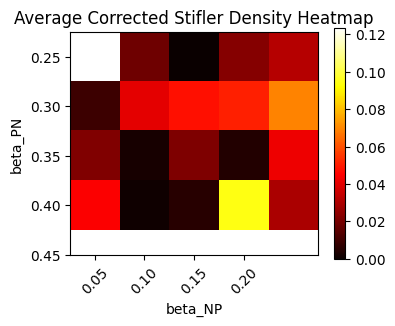

In [144]:
import matplotlib.ticker as ticker

# Plot the heat map
fig, ax = plt.subplots(figsize=(4, 3))
heatmap = ax.imshow(results_rho_C, cmap='hot', interpolation='nearest')

# Set the tick labels and show colorbar
ax.set_xticks(np.arange(len(beta_NP_values)))
ax.set_yticks(np.arange(len(beta_PN_values)))

# Format the tick labels with two decimal places using string formatting
lam1_formatter = ticker.StrMethodFormatter('{:.2f}'.format)
lam2_formatter = ticker.StrMethodFormatter('{:.2f}'.format)
ax.xaxis.set_major_formatter(lam1_formatter)
ax.yaxis.set_major_formatter(lam2_formatter)
#ax.invert_yaxis()

ax.set_xticklabels(['{:.2f}'.format(val) for val in beta_NP_values])
ax.set_yticklabels(['{:.2f}'.format(val) for val in beta_PN_values])
plt.xticks(rotation=45)
plt.colorbar(heatmap)

# Set labels and title
ax.set_xlabel('beta_NP')
ax.set_ylabel('beta_PN')
ax.set_title('Average Corrected Stifler Density Heatmap')

# Display the heat map
plt.show()

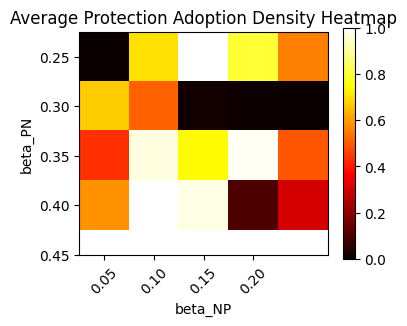

In [145]:
# Plot the heat map
fig, ax = plt.subplots(figsize=(4, 3))
heatmap = ax.imshow(results_rho_P, cmap='hot', interpolation='nearest')

# Set the tick labels and show colorbar
ax.set_xticks(np.arange(len(beta_NP_values)))
ax.set_yticks(np.arange(len(beta_PN_values)))

# Format the tick labels with two decimal places using string formatting
lam1_formatter = ticker.StrMethodFormatter('{:.2f}'.format)
lam2_formatter = ticker.StrMethodFormatter('{:.2f}'.format)
ax.xaxis.set_major_formatter(lam1_formatter)
ax.yaxis.set_major_formatter(lam2_formatter)
#ax.invert_yaxis()

ax.set_xticklabels(['{:.2f}'.format(val) for val in beta_NP_values])
ax.set_yticklabels(['{:.2f}'.format(val) for val in beta_PN_values])
plt.xticks(rotation=45)
plt.colorbar(heatmap)

# Set labels and title
ax.set_xlabel('beta_NP')
ax.set_ylabel('beta_PN')
ax.set_title('Average Protection Adoption Density Heatmap')

# Display the heat map
plt.show()

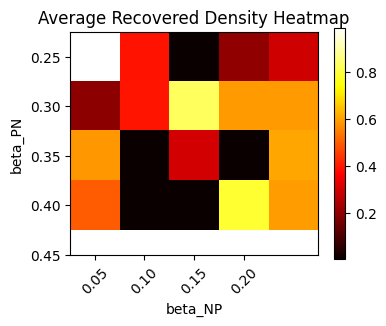

In [146]:
# Plot the heat map
fig, ax = plt.subplots(figsize=(4, 3))
heatmap = ax.imshow(results_rho_R, cmap='hot', interpolation='nearest')

# Set the tick labels and show colorbar
ax.set_xticks(np.arange(len(beta_NP_values)))
ax.set_yticks(np.arange(len(beta_PN_values)))

# Format the tick labels with two decimal places using string formatting
lam1_formatter = ticker.StrMethodFormatter('{:.2f}'.format)
lam2_formatter = ticker.StrMethodFormatter('{:.2f}'.format)
ax.xaxis.set_major_formatter(lam1_formatter)
ax.yaxis.set_major_formatter(lam2_formatter)
#ax.invert_yaxis()

ax.set_xticklabels(['{:.2f}'.format(val) for val in beta_NP_values])
ax.set_yticklabels(['{:.2f}'.format(val) for val in beta_PN_values])
plt.xticks(rotation=45)
plt.colorbar(heatmap)

# Set labels and title
ax.set_xlabel('beta_NP')
ax.set_ylabel('beta_PN')
ax.set_title('Average Recovered Density Heatmap')

# Display the heat map
plt.show()